# FairML

FairML is a python toolbox auditing the machine learning models for bias. https://github.com/adebayoj/fairml

Test fairml installation.

In [1]:
import fairml

FairML needs a model trained on data as the input just for it's IOFP method. We will train a simple logistic regression on the data and give it to fairml to test. It will give information regarding which feature is most important to the model. 

After this we will test individual feature selection methods additional to those used internally in the fairml library without the model.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df_stratified = pd.read_csv("risk_stratified_sample_14oct2019.csv")

In [4]:
df_stratified.drop(df_stratified.columns[df_stratified.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
df_stratified.head()

x_11  x_21  x_22  x_31  x_32  x_41  x_51  x_52  x_61  x_62    output  \
0   0.2   1.0   1.0   0.4   0.3   0.4  0.65  0.50   0.9   0.2  1.696900   
1   1.0   0.8   1.0   0.6   1.0   0.4  0.65  0.80   0.9   0.3  4.830400   
2   0.5   1.0   1.0   0.4   0.3   0.4  0.60  0.60   1.0   0.9  2.840650   
3   1.0   0.8   0.4   0.8   0.1   0.8  1.00  0.65   1.0   0.9  4.123420   
4   0.5   1.0   0.6   1.0   0.3   0.4  1.00  0.50   0.2   0.9  2.682875   

   categories  
0         2.0  
1         5.0  
2         3.0  
3         4.0  
4         3.0

In [5]:
df_stratified.drop(columns=['output'],inplace=True)

In [6]:
X = df_stratified.drop(columns=['categories'])
Y = df_stratified['categories']

In [7]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=42,stratify=Y)

In [8]:
X_train.shape

(566230, 10)

In [9]:
X_test.shape

(377488, 10)

In [10]:
model = LogisticRegression(penalty='l2',solver = 'lbfgs')
model.fit(X_train, Y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = model.predict(X_test)

In [12]:
count_misclassified = (Y_test != y_pred).sum()

In [13]:
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 96031


In [14]:
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


In [15]:
from fairml import audit_model
from fairml import plot_dependencies

In [16]:
total, _ = audit_model(model.predict, X)

In [17]:
print(total)

Feature: x_51,	 Importance: 3.25186655336
Feature: x_41,	 Importance: 3.29773936706
Feature: x_11,	 Importance: 3.47540790787
Feature: x_61,	 Importance: 2.26336575121
Feature: x_62,	 Importance: 2.46930333002
Feature: x_21,	 Importance: 3.40216992788
Feature: x_22,	 Importance: 2.8420587506
Feature: x_32,	 Importance: 2.62698390833
Feature: x_31,	 Importance: 2.77709548827
Feature: x_52,	 Importance: 3.44692164397


In [18]:
#coef for each feature in each class
model.coef_

array([[-7.49006314e+01, -4.27563451e+01, -6.80625699e+00,
        -4.02013812e+00, -2.29328784e+01, -1.87108376e+00,
        -5.92841978e+00, -6.29443795e+00, -4.03341447e+00,
        -6.92863371e-01],
       [-3.54985966e+00,  4.04575358e-01, -3.52370175e-01,
        -2.18314541e-01, -1.83500821e-02, -8.60488658e-02,
        -3.25397029e-01, -3.75933839e-01, -2.54415749e-01,
        -7.75266502e-02],
       [ 1.51575368e+00,  1.43127356e-01,  1.76855802e-01,
         1.63926924e-01,  9.64164327e-01,  3.73540924e-02,
         1.91779676e-01,  1.78651707e-01,  1.57874450e-01,
         1.94912108e-02],
       [ 9.49500948e+00,  4.38087284e+00, -6.36958471e-02,
        -2.73479100e-01, -3.65843386e-01, -1.45721394e-01,
        -7.01023667e-01, -8.51686419e-01, -3.93691233e-01,
        -2.64489055e-01],
       [ 4.80977694e+01,  4.38918174e+01,  1.32750781e+01,
         9.59998359e+00,  1.41386806e+01,  4.80908706e+00,
         1.56610301e+01,  1.88753880e+01,  1.04465345e+01,
         4.

In [19]:
np.hstack((model.intercept_[:,None], model.coef_))

array([[ 7.68847046e+01, -7.49006314e+01, -4.27563451e+01,
        -6.80625699e+00, -4.02013812e+00, -2.29328784e+01,
        -1.87108376e+00, -5.92841978e+00, -6.29443795e+00,
        -4.03341447e+00, -6.92863371e-01],
       [ 1.95136598e+00, -3.54985966e+00,  4.04575358e-01,
        -3.52370175e-01, -2.18314541e-01, -1.83500821e-02,
        -8.60488658e-02, -3.25397029e-01, -3.75933839e-01,
        -2.54415749e-01, -7.75266502e-02],
       [-3.25972310e+00,  1.51575368e+00,  1.43127356e-01,
         1.76855802e-01,  1.63926924e-01,  9.64164327e-01,
         3.73540924e-02,  1.91779676e-01,  1.78651707e-01,
         1.57874450e-01,  1.94912108e-02],
       [-1.13810141e+01,  9.49500948e+00,  4.38087284e+00,
        -6.36958471e-02, -2.73479100e-01, -3.65843386e-01,
        -1.45721394e-01, -7.01023667e-01, -8.51686419e-01,
        -3.93691233e-01, -2.64489055e-01],
       [-1.47897781e+02,  4.80977694e+01,  4.38918174e+01,
         1.32750781e+01,  9.59998359e+00,  1.41386806e+01,
  

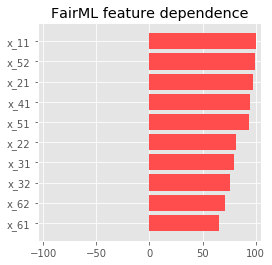

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

## Testing Individual Elements in FairML:
    
FairML uses feature selection methods to predict weights.

First is regularization : Lasso (Will try general first then I need to see if Fairml uses some specific one)

After regularization we'll try out tree and univariate.


In [21]:
def pretty_print_linear(coefs,names=None,sort=False):
    if names == None:
        names = ["%s" % x for x in X.columns]
    lst = zip(coefs,names)
    if sort:
        lst = sorted(lst, key=lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef,3),name)for coef, name in lst)

### LASSO 

Lasso adds a penalty of __alpha* summation of(weights of features from 0 to n)__

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.02)
lasso.fit(X,Y)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
pretty_print_linear(lasso.coef_)

'2.619 * x_11 + 1.56 * x_21 + 0.253 * x_22 + 0.015 * x_31 + 0.581 * x_32 + 0.0 * x_41 + 0.0 * x_51 + 0.0 * x_52 + 0.143 * x_61 + 0.0 * x_62'

### RIDGE : L-2 Norm

It's different from L-1 Norm as it forces the coefficients to be more spread out. Correlated features tend to get similar coefficients. Coefficients do not fluctuate with small changes in data because of the squared power. 

The formula: 

__alpha * summation( square(weights) from 0 to the nth feature)__

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge(alpha=10)
ridge.fit(X,Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
pretty_print_linear(ridge.coef_)

'2.803 * x_11 + 1.884 * x_21 + 0.453 * x_22 + 0.273 * x_31 + 0.75 * x_32 + 0.134 * x_41 + 0.434 * x_51 + 0.496 * x_52 + 0.296 * x_61 + 0.084 * x_62'

## Tree based feature selection

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,Y)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
print "Features sorted by their scores"
print sorted(zip(map(lambda x: round(x,4),rf.feature_importances_),X.columns),reverse=True)

Features sorted by their scores
[(0.6585, 'x_11'), (0.1853, 'x_21'), (0.0628, 'x_32'), (0.0234, 'x_22'), (0.0195, 'x_61'), (0.0169, 'x_51'), (0.0142, 'x_31'), (0.0099, 'x_52'), (0.0053, 'x_62'), (0.0042, 'x_41')]


#### Vizualizing a final decision tree based on the random forest methods

In [28]:
#Gives a list of all trees in random forest, I can extract one tree
estimator = rf.estimators_[2]

In [29]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,max_depth=5, out_file='tree.dot', 
                feature_names = X.columns,
                class_names =X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [30]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [31]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Univariate Feature Selection

Examines each feature individually along with the target variable. They're just useful to get a better understanding of data rather than feature selection.

#### Pearson Correlation

Measures linear correlation between two variables, resulting value lies between [-1,1]; -1 being perfectly negative correlation. The drawback is that correlations are better in linear relationships.

In [32]:
from scipy.stats import pearsonr
for i in range(len(X.columns)):
    print(X.columns[i],pearsonr(X.iloc[:,i],Y))

('x_11', (0.8116499942677636, 0.0))
('x_21', (0.4103096650412308, 0.0))
('x_22', (0.19573361228013944, 0.0))
('x_31', (0.04957620042472105, 0.0))
('x_32', (0.22688846686304653, 0.0))
('x_41', (0.01808888909271128, 3.904386816770317e-69))
('x_51', (0.07958100594662094, 0.0))
('x_52', (0.043635498933719825, 0.0))
('x_61', (0.09376780988733861, 0.0))
('x_62', (0.02362153700117136, 1.4616983267355302e-116))


#### Mutual Information and maximal information coefficient

In [33]:
from minepy import MINE
mic = MINE()

Computes all following scores for x_11 and Y = target variable

In [ ]:
mic.compute_score(X.x_11,Y)

Returns the Maximal Information Coefficient (MIC or MIC_e).

In [39]:
mic.mic()

0.5577810919538793

Returns maximim asymmetry score

In [41]:
mic.mas()

0.034393920004665124

Returns the maximum normalized mutual information scores (i.e. the characteristic matrix M if est=”mic_approx”, the equicharacteristic matrix instead). M is a list of 1d numpy arrays where M[i][j] contains the score using a grid partitioning x-values into i+2 bins and y-values into j+2 bins.

In [36]:
mic.get_score()

[array([0.42619422, 0.55778109, 0.55778109, ..., 0.55778109, 0.55778109,
        0.55778109]),
 array([0.53313606, 0.46089623, 0.46089623, ..., 0.46089623, 0.46089623,
        0.46089623]),
 array([0.54370352, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.49408496,
        0.49408496, 0.49408496, 0.49408496, 0.49408496, 0.4940

Returns the Total Information Coefficient (TIC or TIC_e). If norm==True TIC will be normalized in [0, 1].

In [37]:
mic.tic(norm=False)

12380.772127815324